In [68]:
import pandas as pd
df = pd.read_csv ('data_clean/cleaned_final_cars_data.csv')
df.head(2)

,model,year,price,total_km,hp,box,body,drive,fuel,location
0,Mitsubishi Lancer,2014,650000.0,100181.0,140.0,CVT,седан,передний,бензин,Москва
1,Mazda 3,2008,490000.0,213000.0,105.0,MT,седан,передний,бензин,Свердловская область


In [71]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     5656 non-null   object 
 1   year      5656 non-null   int64  
 2   price     5656 non-null   float64
 3   total_km  5656 non-null   float64
 4   hp        5656 non-null   float64
 5   box       5642 non-null   object 
 6   body      5656 non-null   object 
 7   drive     5656 non-null   object 
 8   fuel      5656 non-null   object 
 9   location  5656 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 442.0+ KB


In [72]:
df.describe ()

,year,price,total_km,hp
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,2012.216407,696539.233911,137306.148161,132.765205
std,5.132224,155618.216508,84263.716593,48.952725
min,1940.000000,450000.000000,1.000000,22.000000
25%,2009.000000,565000.000000,82000.000000,106.000000
50%,2012.000000,685000.000000,130506.000000,122.000000
75%,2016.000000,819000.000000,179000.000000,147.000000
max,2021.000000,1000000.000000,960000.000000,510.000000


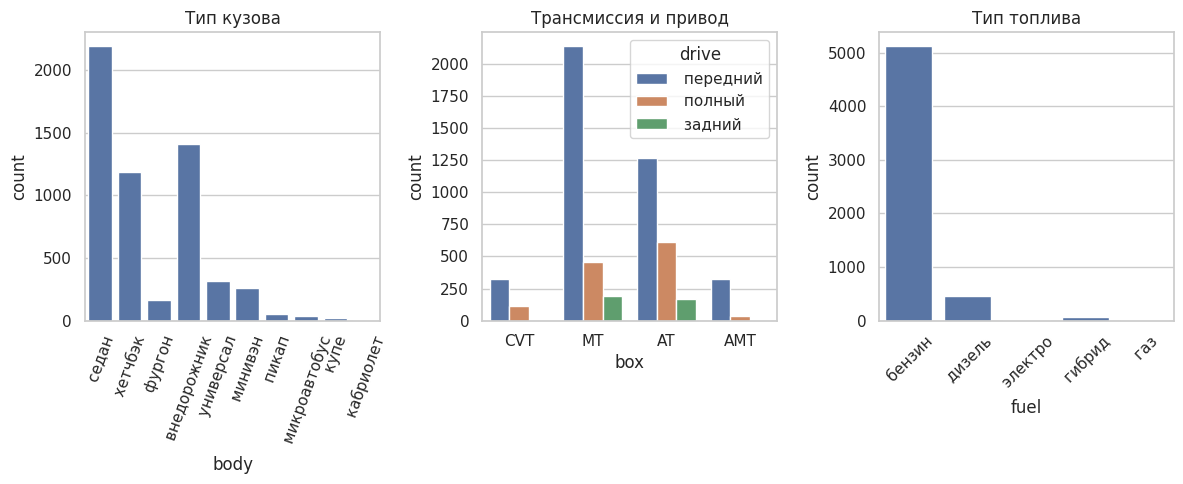

In [70]:
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns

figure, axes = plt.subplots(1, 3, figsize=(12,5))

plt.subplot(1,3,1)
ax = sns.countplot(x='body',data=df)
plt.xticks(rotation= 70)
plt.title("Тип кузова")

plt.subplot(1,3,2)
ax = sns.countplot(x='box', hue='drive', data=df)
plt.title("Трансмиссия и привод")

plt.subplot(1,3,3)
ax = sns.countplot(x='fuel',data=df)
plt.xticks(rotation= 45)
plt.title("Тип топлива")

plt.tight_layout()
plt.show()


In [73]:
df.body.value_counts()

body
седан           2194
внедорожник     1411
хетчбэк         1189
универсал        315
минивэн          259
фургон           168
пикап             51
микроавтобус      40
купе              24
кабриолет          5
Name: count, dtype: int64

In [74]:
df.fuel.value_counts()

fuel
бензин     5124
дизель      462
гибрид       58
электро       9
газ           3
Name: count, dtype: int64

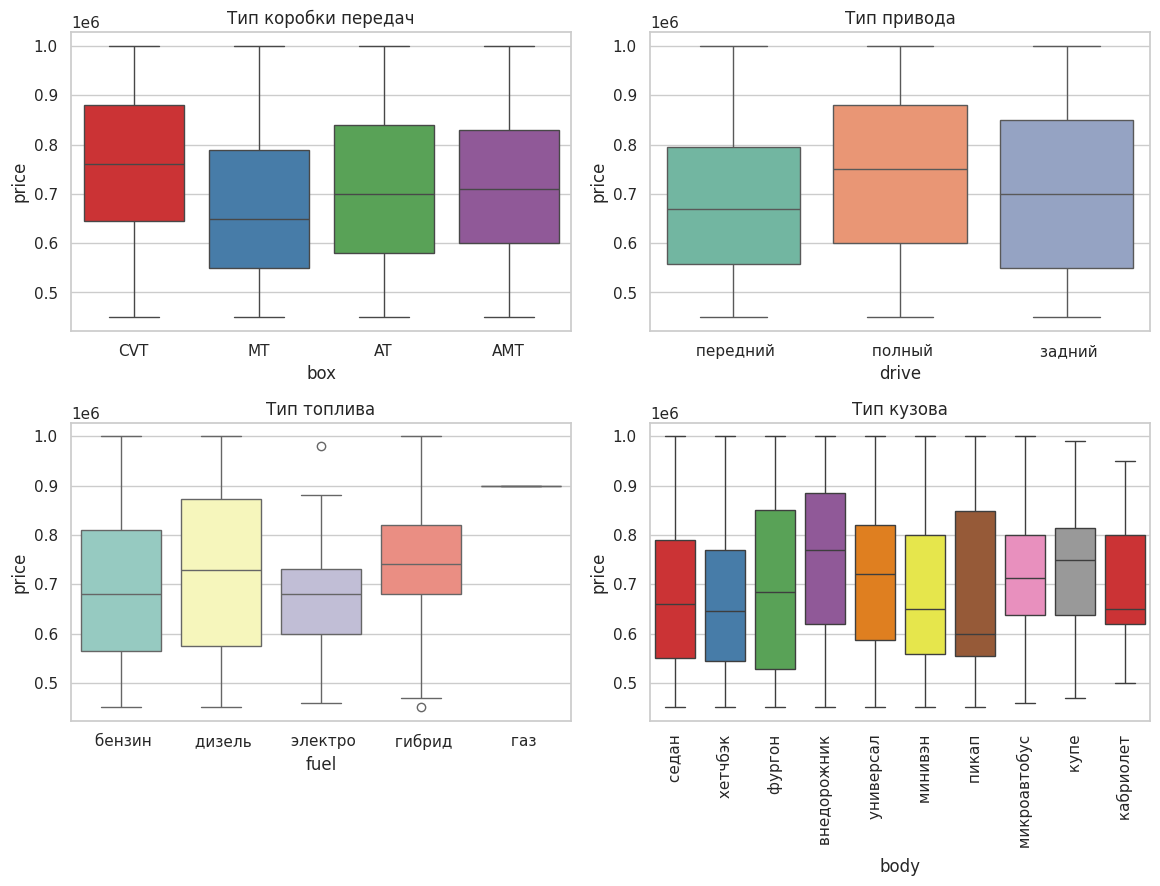

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка равенства дисперсий (Условие 3)
# BOX: MT, A и AMT в порядке, CVT немного расходится
# BODY: 
# FUEL: Исследовать GAZ

# Создание сетки графиков
figure, axes = plt.subplots(2, 2, figsize=(12, 8))

# График для типа коробки передач
sns.boxplot(x='box', y='price', hue='box', data=df, ax=axes[0, 0], palette='Set1', legend=False)
axes[0, 0].set_title('Тип коробки передач')

# График для типа привода
sns.boxplot(x='drive', y='price', hue='drive', data=df, ax=axes[0, 1], palette='Set2', legend=False)
axes[0, 1].set_title('Тип привода')

# График для типа топлива
sns.boxplot(x='fuel', y='price', hue='fuel', data=df, ax=axes[1, 0], palette='Set3', legend=False)
axes[1, 0].set_title('Тип топлива')

# График для типа кузова
sns.boxplot(x='body', y='price', hue='body', data=df, ax=axes[1, 1], palette='Set1', legend=False)
axes[1, 1].set_title('Тип кузова')

# Улучшение компактности расположения
plt.tight_layout()

# Поворот подписей оси X для лучшей читаемости
plt.xticks(rotation='vertical')

# Отображение графика
plt.show()


In [48]:
## Подробное описание стандартного отклонения 
## см. в нашем вспомогательном файле.

## В этом контексте стандартное отклонение 5,132224 означает, 
## что в среднем годы в вашем наборе данных отклоняются от среднего года примерно на 5,132224 года.
df.describe ()

,year,price,total_km,hp
count,5656.000000,5656.000000,5656.000000,5656.000000
mean,2012.216407,696539.233911,137306.148161,132.765205
std,5.132224,155618.216508,84263.716593,48.952725
min,1940.000000,450000.000000,1.000000,22.000000
25%,2009.000000,565000.000000,82000.000000,106.000000
50%,2012.000000,685000.000000,130506.000000,122.000000
75%,2016.000000,819000.000000,179000.000000,147.000000
max,2021.000000,1000000.000000,960000.000000,510.000000


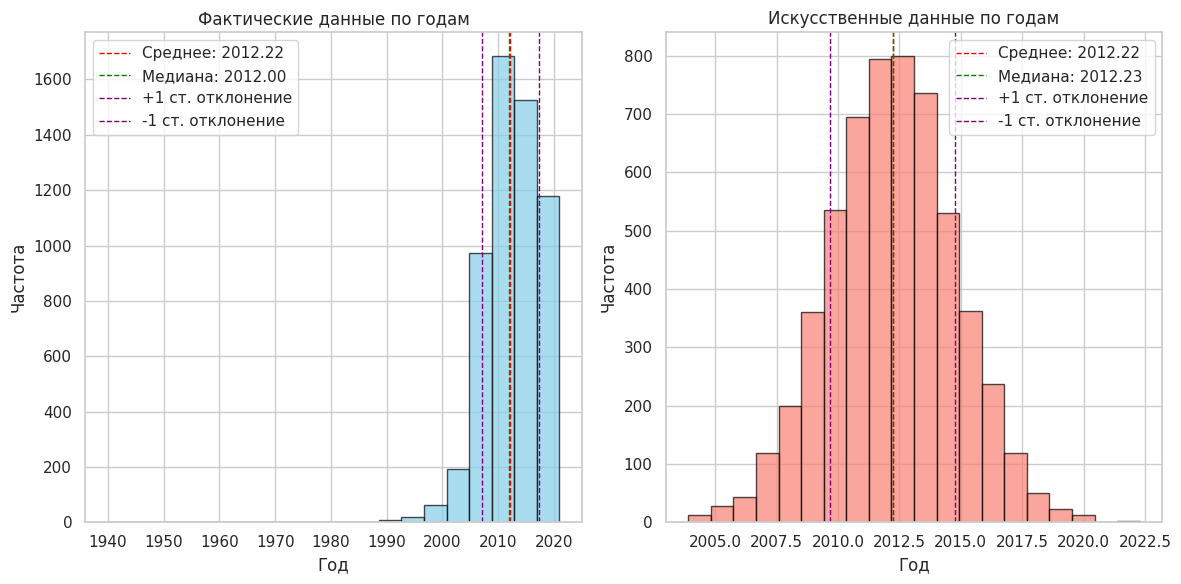

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Статистика по оригинальным данным
data_stats = {
    "count": 5656,
    "mean": 2012.216407,
    "std": 5.132224,
    "min": 1940,
    "25%": 2009,
    "50%": 2012,
    "75%": 2016,
    "max": 2021
}

# Генерация искусственных данных для столбца "year" с меньшим стандартным отклонением
np.random.seed(42)  # Для воспроизводимости результатов
artificial_years = np.random.normal(data_stats['mean'], data_stats['std'] / 2, data_stats['count'])

# Создание DataFrame с искусственными данными
df_artificial = pd.DataFrame({'year': artificial_years})

# Построение гистограмм рядом друг с другом
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы для реальных данных
axs[0].hist(df['year'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_title('Фактические данные по годам')
axs[0].set_xlabel('Год')
axs[0].set_ylabel('Частота')

# Добавление среднего, медианы и +-1 стандартного отклонения на график для фактических данных
mean_actual = df['year'].mean()
median_actual = df['year'].median()
std_dev_actual = df['year'].std()
axs[0].axvline(mean_actual, color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {mean_actual:.2f}')
axs[0].axvline(median_actual, color='green', linestyle='dashed', linewidth=1, label=f'Медиана: {median_actual:.2f}')
axs[0].axvline(mean_actual + std_dev_actual, color='purple', linestyle='dashed', linewidth=1, label='+1 ст. отклонение')
axs[0].axvline(mean_actual - std_dev_actual, color='purple', linestyle='dashed', linewidth=1, label='-1 ст. отклонение')
axs[0].legend()

# Построение гистограммы для искусственных данных
axs[1].hist(df_artificial['year'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axs[1].set_title('Искусственные данные по годам')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Частота')

# Добавление среднего, медианы и +-1 стандартного отклонения на график для искусственных данных
mean_artificial = df_artificial['year'].mean()
median_artificial = df_artificial['year'].median()
std_dev_artificial = df_artificial['year'].std()
axs[1].axvline(mean_artificial, color='red', linestyle='dashed', linewidth=1, label=f'Среднее: {mean_artificial:.2f}')
axs[1].axvline(median_artificial, color='green', linestyle='dashed', linewidth=1, label=f'Медиана: {median_artificial:.2f}')
axs[1].axvline(mean_artificial + std_dev_artificial, color='purple', linestyle='dashed', linewidth=1, label='+1 ст. отклонение')
axs[1].axvline(mean_artificial - std_dev_artificial, color='purple', linestyle='dashed', linewidth=1, label='-1 ст. отклонение')
axs[1].legend()

plt.tight_layout()
plt.show()


In [50]:
## Гистограмма - это графическое представление распределения данных по интервалам или категориям. 
## Она показывает частоту или относительную частоту появления значений в каждом интервале или категории.

## Стандартное отклонение - это мера разброса данных относительно их среднего значения. 
## Оно показывает, насколько значения данных распределены вокруг среднего значения, 
## при этом чем выше стандартное отклонение, тем больше разброс данных.

## Медиана - это значение, которое разделяет упорядоченный набор данных на две равные половины. 
## Если количество наблюдений нечетное, то медиана - это значение, находящееся посередине. 
## Если количество наблюдений четное, то медиана - это среднее арифметическое двух средних значений.

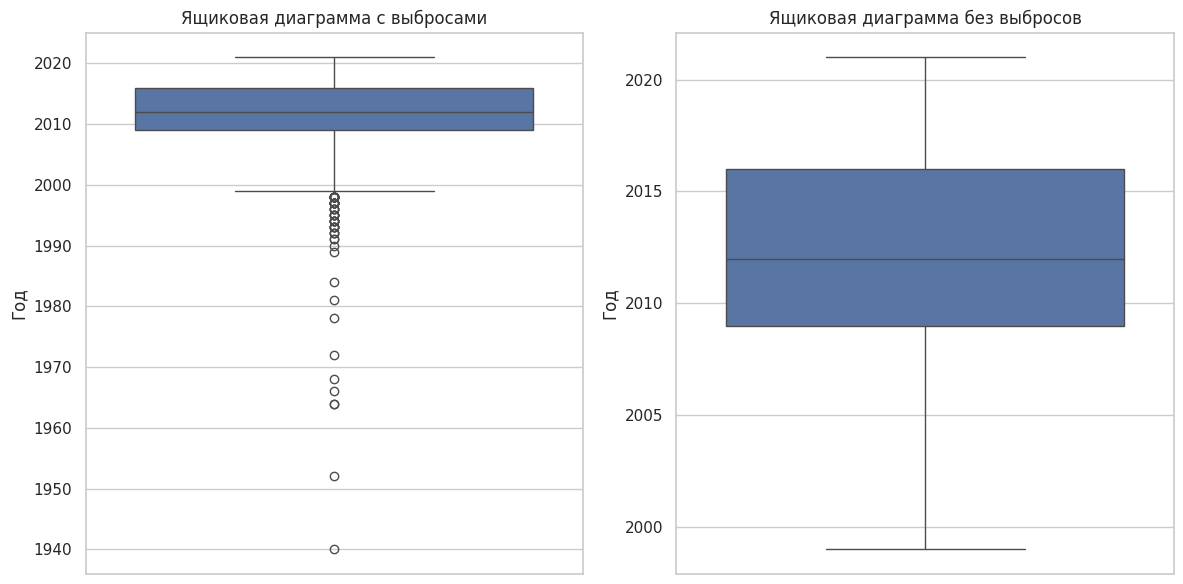

In [51]:
# pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot с выбросами
sns.boxplot(ax=axes[0], data=df, y='year')
axes[0].set_title('Ящиковая диаграмма с выбросами')
axes[0].set_ylabel('Год')

# Boxplot без выбросов
sns.boxplot(ax=axes[1], data=df, y='year', showfliers=False)
axes[1].set_title('Ящиковая диаграмма без выбросов')
axes[1].set_ylabel('Год')

plt.tight_layout()
plt.show()

In [52]:
## Ящик (box): Представляет интерквартильный размах (IQR), который охватывает 50% наблюдений. 
## Верхний и нижний края ящика обозначают первый (25-й процентиль) и третий (75-й процентиль) квартили соответственно. 
## Линия внутри ящика - это медиана (50-й процентиль).

## Усы (whiskers): Это линии, выходящие из ящика в обе стороны. 
## Они обозначают диапазон значений, который находится в пределах 1.5 * IQR от первого и третьего квартилей. 
## За пределами этого диапазона значения считаются выбросами и отображаются в виде отдельных точек или маркеров.

## Выбросы (outliers): Это отдельные значения, находящиеся за пределами усов. 
## Они могут представлять собой экстремальные значения или аномалии в данных.

In [53]:
## Давайте посмотрим еще пару примеров гистограмм и распределения данных.

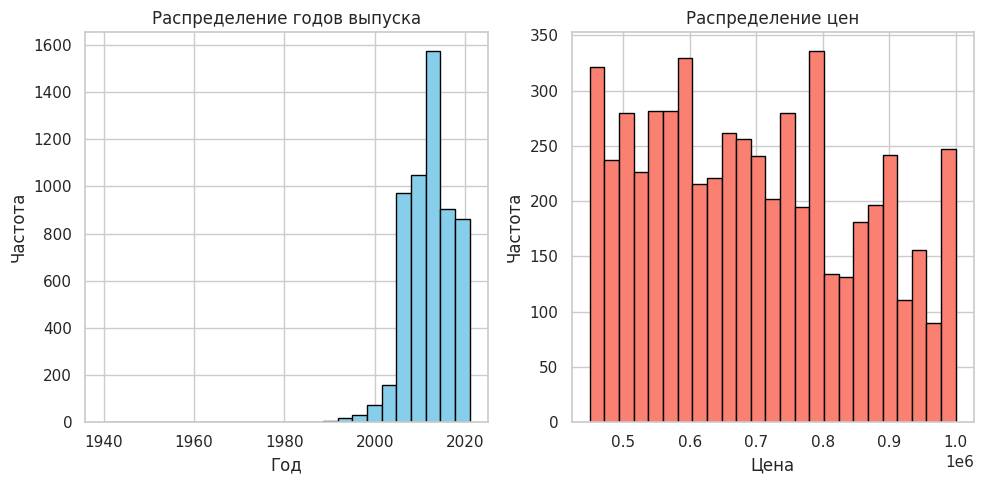

In [54]:
# Устанавливаем matplotlib для отображения графиков внутри Jupyter Notebook
%matplotlib inline

# Создаем гистограммы рядом друг с другом
plt.figure(figsize=(10, 5))

# Гистограмма для 'year'
plt.subplot(1, 2, 1)
plt.hist(df['year'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Год')  # Метка по оси X
plt.ylabel('Частота')  # Метка по оси Y
plt.title('Распределение годов выпуска')  # Заголовок гистограммы

# Гистограмма для 'price'
plt.subplot(1, 2, 2)
plt.hist(df['price'], bins=25, color='salmon', edgecolor='black')
plt.xlabel('Цена')  # Метка по оси X
plt.ylabel('Частота')  # Метка по оси Y
plt.title('Распределение цен')  # Заголовок гистограммы

# Отображаем график
plt.tight_layout()
plt.show()

In [55]:
## Сравнивать год и цену без какой-либо связи — это все равно, что сравнивать, 
## например, яблоки с гирями весом 32 кг. НО для визуального изучения гистограмм, 
## изменения данных и их точности это хороший наглядный пример.

In [56]:
## А теперь давайте посмотрим гистограммы и коробчатые диаграммы вместе на один огромный график с подграфиками. 
## Помните, что вы всегда можете изменить интервалы гистограмм (bins). На самом деле, вы можете попробовать это здесь, если хотите

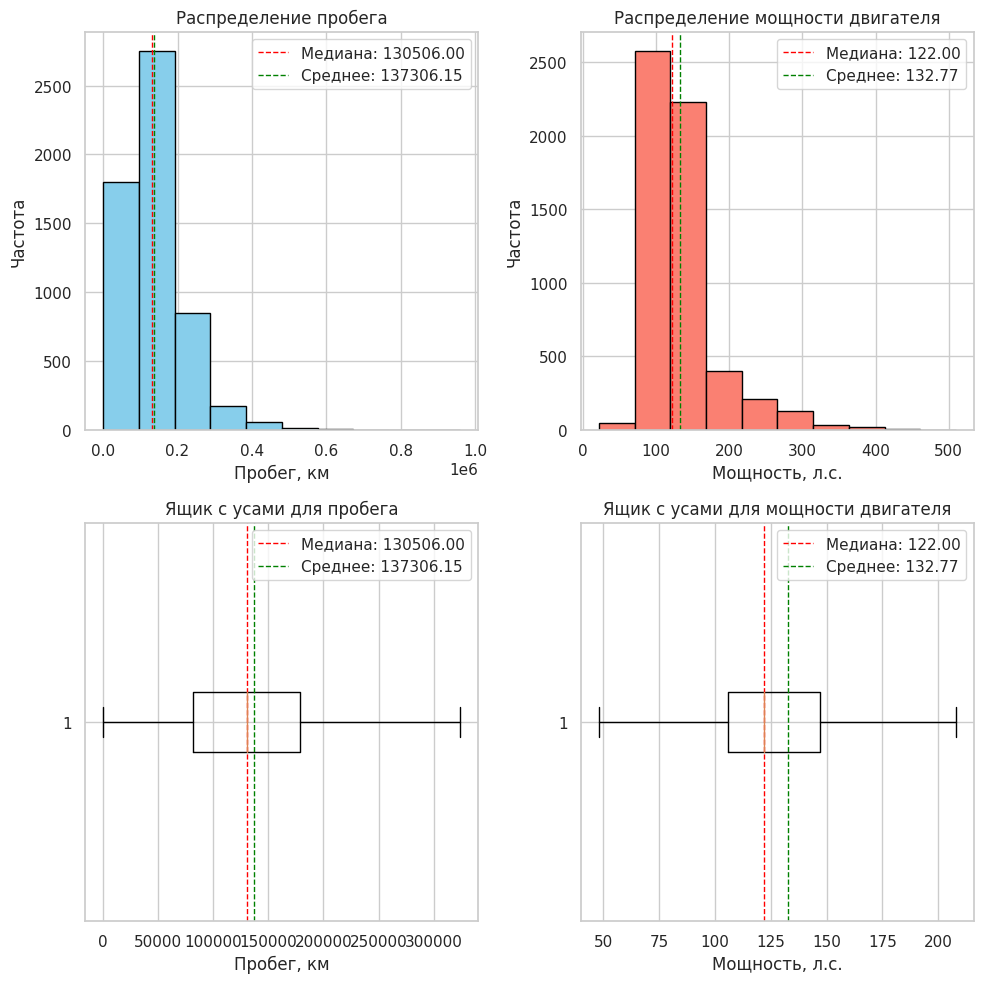

In [57]:
# Устанавливаем matplotlib для отображения графиков внутри Jupyter Notebook
%matplotlib inline

# Создаем графики 2x2
plt.figure(figsize=(10, 10))

# Гистограмма для 'total_km' (верхний левый)
plt.subplot(2, 2, 1)
plt.hist(df['total_km'], bins=10, color='skyblue', edgecolor='black')
plt.axvline(df['total_km'].median(), color='red', linestyle='dashed', linewidth=1, label='Медиана: {:.2f}'.format(df['total_km'].median()))
plt.axvline(df['total_km'].mean(), color='green', linestyle='dashed', linewidth=1, label='Среднее: {:.2f}'.format(df['total_km'].mean()))
plt.xlabel('Пробег, км')  # Метка по оси X
plt.ylabel('Частота')  # Метка по оси Y
plt.title('Распределение пробега')  # Заголовок графика
plt.legend()

# Гистограмма для 'hp' (верхний правый)
plt.subplot(2, 2, 2)
plt.hist(df['hp'], bins=10, color='salmon', edgecolor='black')
plt.axvline(df['hp'].median(), color='red', linestyle='dashed', linewidth=1, label='Медиана: {:.2f}'.format(df['hp'].median()))
plt.axvline(df['hp'].mean(), color='green', linestyle='dashed', linewidth=1, label='Среднее: {:.2f}'.format(df['hp'].mean()))
plt.xlabel('Мощность, л.с.')  # Метка по оси X
plt.ylabel('Частота')  # Метка по оси Y
plt.title('Распределение мощности двигателя')  # Заголовок графика
plt.legend()

# Ящик с усами для 'total_km' без выбросов (нижний левый)
plt.subplot(2, 2, 3)
plt.boxplot(df['total_km'], vert=False, showfliers=False)
plt.axvline(df['total_km'].median(), color='red', linestyle='dashed', linewidth=1, label='Медиана: {:.2f}'.format(df['total_km'].median()))
plt.axvline(df['total_km'].mean(), color='green', linestyle='dashed', linewidth=1, label='Среднее: {:.2f}'.format(df['total_km'].mean()))
plt.xlabel('Пробег, км')  # Метка по оси X
plt.title('Ящик с усами для пробега')  # Заголовок графика
plt.legend()

# Ящик с усами для 'hp' без выбросов (нижний правый)
plt.subplot(2, 2, 4)
plt.boxplot(df['hp'], vert=False, showfliers=False)
plt.axvline(df['hp'].median(), color='red', linestyle='dashed', linewidth=1, label='Медиана: {:.2f}'.format(df['hp'].median()))
plt.axvline(df['hp'].mean(), color='green', linestyle='dashed', linewidth=1, label='Среднее: {:.2f}'.format(df['hp'].mean()))
plt.xlabel('Мощность, л.с.')  # Метка по оси X
plt.title('Ящик с усами для мощности двигателя')  # Заголовок графика
plt.legend()

# Отображаем графики
plt.tight_layout()
plt.show()

In [58]:
## И еще раз — коробчатые диаграммы с выбросами

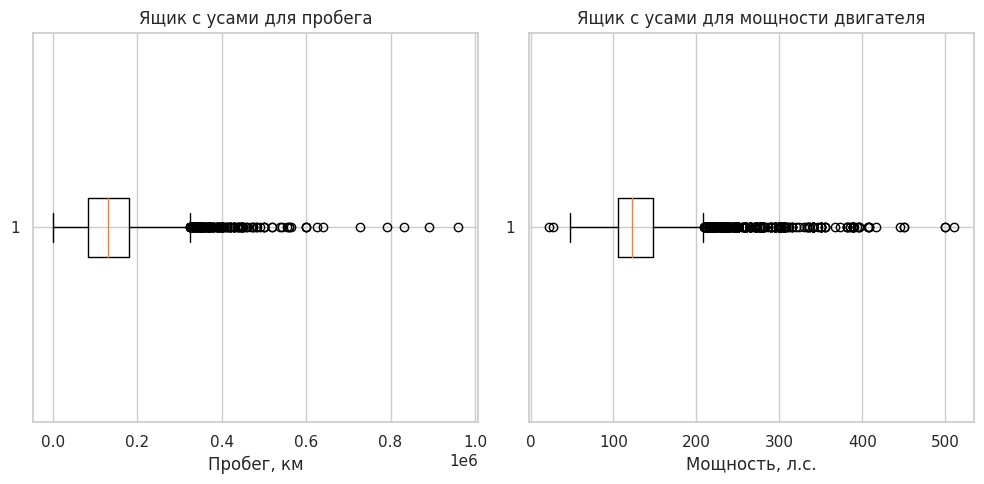

In [59]:
# Устанавливаем matplotlib для отображения графиков внутри Jupyter Notebook
%matplotlib inline

# Создаем ящики с усами с выбросами
plt.figure(figsize=(10, 5))

# Ящик с усами для 'total_km'
plt.subplot(1, 2, 1)
plt.boxplot(df['total_km'], vert=False)
plt.xlabel('Пробег, км')  # Метка по оси X
plt.title('Ящик с усами для пробега')  # Заголовок графика

# Ящик с усами для 'hp'
plt.subplot(1, 2, 2)
plt.boxplot(df['hp'], vert=False)
plt.xlabel('Мощность, л.с.')  # Метка по оси X
plt.title('Ящик с усами для мощности двигателя')  # Заголовок графика

# Отображаем график
plt.tight_layout()
plt.show()

Коэффициент корреляции Пирсона между 'total_km' и 'price': -0.18032466044340115


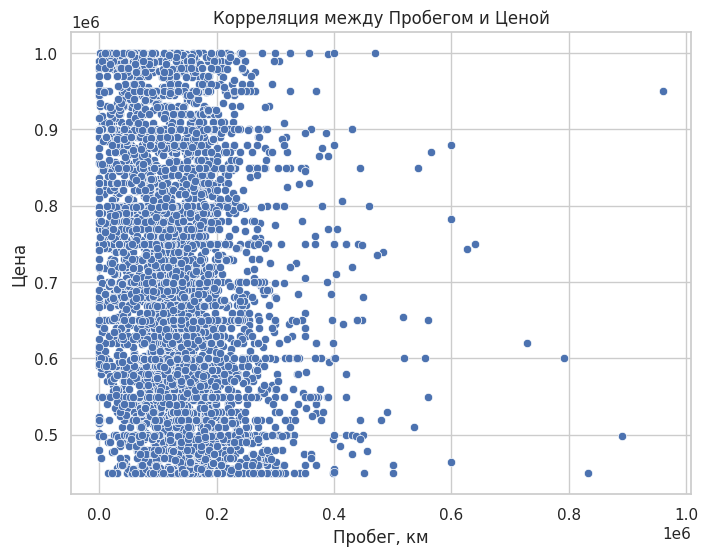

Коэффициент корреляции Пирсона: -0.18032466044340112
P-значение: 1.5176913153024247e-42


In [60]:
# Шаг 1: Рассчитываем коэффициент корреляции Пирсона
correlation_coefficient = df['total_km'].corr(df['price'])
print("Коэффициент корреляции Пирсона между 'total_km' и 'price':", correlation_coefficient)

# Шаг 2: Создаем график корреляции
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_km', y='price', data=df)
plt.title('Корреляция между Пробегом и Ценой')
plt.xlabel('Пробег, км')
plt.ylabel('Цена')
plt.show()

# Шаг 3: Выполняем статистическое тестирование (по желанию)
# Можно использовать библиотеку scipy для выполнения статистического тестирования, например, тест на значимость коэффициента корреляции Пирсона.
from scipy.stats import pearsonr

# Выполняем тест на значимость коэффициента корреляции Пирсона
corr, p_value = pearsonr(df['total_km'], df['price'])
print("Коэффициент корреляции Пирсона:", corr)
print("P-значение:", p_value)

In [61]:
## Коэффициент корреляции Пирсона: -0.18032466044340112

## Этот коэффициент показывает силу и направление линейной связи между двумя переменными. 
## Значение -0.18 указывает на слабую отрицательную корреляцию между 'total_km' и 'price'. 
##Это означает, что с увеличением пробега цена имеет тенденцию к снижению, хотя связь не слишком сильная.


# P-значение: 1.5176913153024247e-42

## P-значение используется для проверки статистической значимости корреляции. 
## Здесь очень маленькое P-значение (порядка 10^(-42)), что означает, 
## что есть крайне маленькая вероятность получить такой коэффициент корреляции между 
## 'total_km' и 'price', если бы в действительности корреляция отсутствовала. 
## Таким образом, мы можем считать эту корреляцию статистически значимой.

In [62]:
df.shape

(5656, 9)

Коэффициент корреляции Пирсона между 'total_km' и 'price' - Фактические данные: -0.18032466044340115
Коэффициент корреляции Пирсона: -0.18032466044340112
P-значение: 1.5176913153024247e-42
****************************************************************************************************
Коэффициент корреляции Пирсона: Фиктивные данные -0.13769923408700646
Коэффициент корреляции Пирсона: -0.13769923408700643
P-значение: 2.3983865594121746e-25


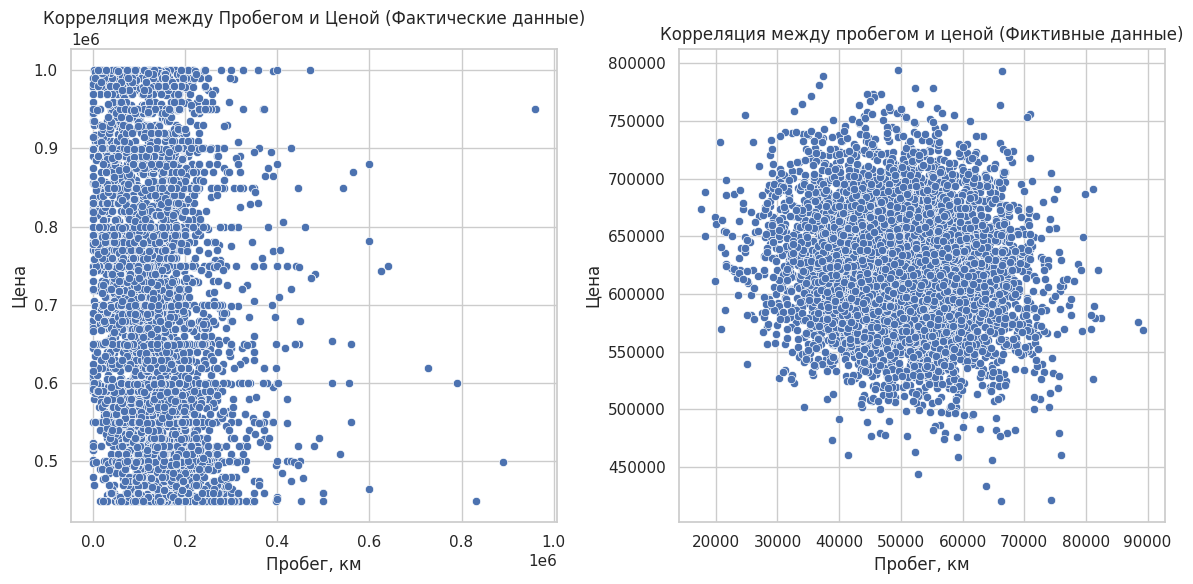

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Фактические данные
# Шаг 1: Рассчитываем коэффициент корреляции Пирсона
correlation_coefficient = df['total_km'].corr(df['price'])
print("Коэффициент корреляции Пирсона между 'total_km' и 'price' - Фактические данные:", correlation_coefficient)

# Шаг 2: Создаем график корреляции
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for Actual Data
sns.scatterplot(x='total_km', y='price', data=df)
plt.title('Корреляция между Пробегом и Ценой (Фактические данные)')
plt.xlabel('Пробег, км')
plt.ylabel('Цена')

# Шаг 3: Выполняем статистическое тестирование (по желанию)
# Можно использовать библиотеку scipy для выполнения статистического тестирования, например, тест на значимость коэффициента корреляции Пирсона.
corr, p_value = pearsonr(df['total_km'], df['price'])
print("Коэффициент корреляции Пирсона:", corr)
print("P-значение:", p_value)

print ('*'*100)
###############################################################

# Фиктивные данные
# Генерируем случайные данные для total_km и price
np.random.seed(42)
total_km = np.random.normal(loc=50000, scale=10000, size=5656)
price = -0.5 * total_km + np.random.normal(loc=650000, scale=50000, size=5656)

# Создаем DataFrame
df_fake = pd.DataFrame({'total_km': total_km, 'price': price})

# Step 1: Calculate Pearson correlation coefficient
correlation_coefficient = df_fake['total_km'].corr(df_fake['price'])
print("Коэффициент корреляции Пирсона: Фиктивные данные", correlation_coefficient)

# Step 2: Create a correlation plot
plt.subplot(1, 2, 2)  # Subplot for Fake Data
sns.scatterplot(x='total_km', y='price', data=df_fake)
plt.title('Корреляция между пробегом и ценой (Фиктивные данные)')
plt.xlabel('Пробег, км')
plt.ylabel('Цена')

# Step 3: Perform statistical testing (optional)
# You can use the scipy library to perform statistical testing, for example, Pearson correlation significance test.
corr, p_value = pearsonr(df_fake['total_km'], df_fake['price'])
print("Коэффициент корреляции Пирсона:", corr)
print("P-значение:", p_value)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
